<a href="https://colab.research.google.com/github/Studwrestler/MLA_COH/blob/main/MLA2_COH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Chase Hall**  

## Standard Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [68]:
#example - you will replace this with the models you are actually using.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


## Imports for Splitting Data and Building Pipeline


In [47]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [49]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [50]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [51]:
df = pd.read_csv('/content/gdrive/MyDrive/CS 430/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [52]:
new_column_names = {
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': '	lag_current_pwr',
    'Leading_Current_Power_Factor': '	lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}
df = df.rename(columns=new_column_names)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),\tlag_current_pwr,\tlead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Statistical and Visual Exploration

In [53]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),\tlag_current_pwr,\tlead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [54]:
load_type_counts = df['load_type'].value_counts()
load_type_df = pd.DataFrame({'Load Type': load_type_counts.index, 'Count': load_type_counts.values})
load_type_df

,Load Type,Count
0,Light_Load,18072
1,Medium_Load,9696
2,Maximum_Load,7272


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


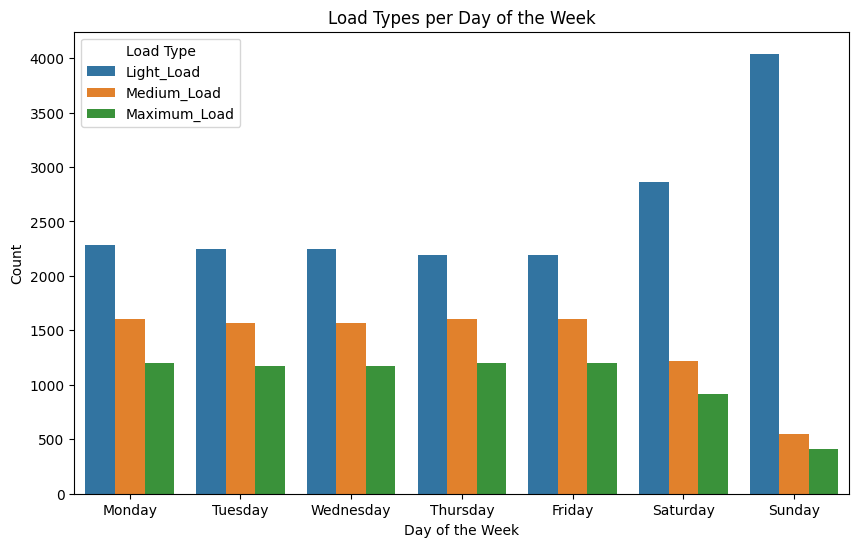

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='load_type', data=df)
plt.title('Load Types per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Load Type')
plt.show()

The interesting trends I see is that the loads lighten on the weekends especially on sunday. I also noticed that each week day is roughly the same

### Splitting Data into Train/Test

In [56]:
X = df.drop(['date', 'usage_kwh'], axis=1)
Y= df['usage_kwh']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Building the Pipeline

In [57]:
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')


In [58]:

pipeline = Pipeline([
    ('transformer', ct),
    ('linear_regression', LinearRegression())
])


### Executing the Model

In [59]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       '\tlag_current_pwr', '\tlead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

### Evaluating Model

In [60]:
y_pred = pipeline.predict(X_test)

In [61]:
y_train_pred = pipeline.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"RMSE for training data: {rmse_train}")
print(f"RMSE for testing data: {rmse_test}")


RMSE for training data: 4.785832575403094
RMSE for testing data: 4.224012202014671


In [62]:
r2 = r2_score(Y_test, y_pred)
print(f"R-squared for testing data: {r2}")


R-squared for testing data: 0.9843037490428131


In [63]:
print(f"Intercept: {pipeline['linear_regression'].intercept_}")
print(f"Coefficients: {pipeline['linear_regression'].coef_}")

Intercept: -10.619186112379563
Coefficients: [ 3.17262028e+01  1.96727632e+00  1.15067949e+02  1.21859850e+01
  6.07039277e+00 -2.45728214e-01 -1.39006406e-02  1.39006406e-02
 -1.55506940e-01 -1.36341692e-01 -1.40020893e-01  1.53921534e-01
 -2.19683806e-01  5.72722964e-01 -7.50911673e-02 -1.04700642e+00
  2.77328377e-01  7.69678047e-01]


### Conclusion
I think this a suitable model for this data because the r squared value was super close to 1, meaning that the model create a line through almost all the data.

## Problem 2

### Reading the Data

In [64]:
df['week_status'] = df['week_status'].map({'Weekday': 1, 'Weekend': 0})

### Splitting Data into Train/Test

In [66]:
X1 = df.drop(['date', 'week_status', 'day_of_week'], axis=1)
y1 = df['week_status']
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


### Building the Pipeline

In [69]:
numerical_features1 = x1_train.select_dtypes(include=['number']).columns
categorical_features1 = x1_train.select_dtypes(include=['object']).columns

ct1 = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features1),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ], remainder='passthrough')


pipeline1 = Pipeline([
    ('transformer', ct1),
    ('logistic_regression', LogisticRegression())
])


### Executing the Model

In [71]:
pipeline1.fit(x1_train, y1_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  Index(['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       '\tlag_current_pwr', '\tlead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['load_type'], dtype='object'))])),
                ('logistic_regression', LogisticRegression())])

### Evaluating Model

Precision: 0.7754087848669445
Recall: 0.9623955431754875
F1-score: 0.8588423295454546


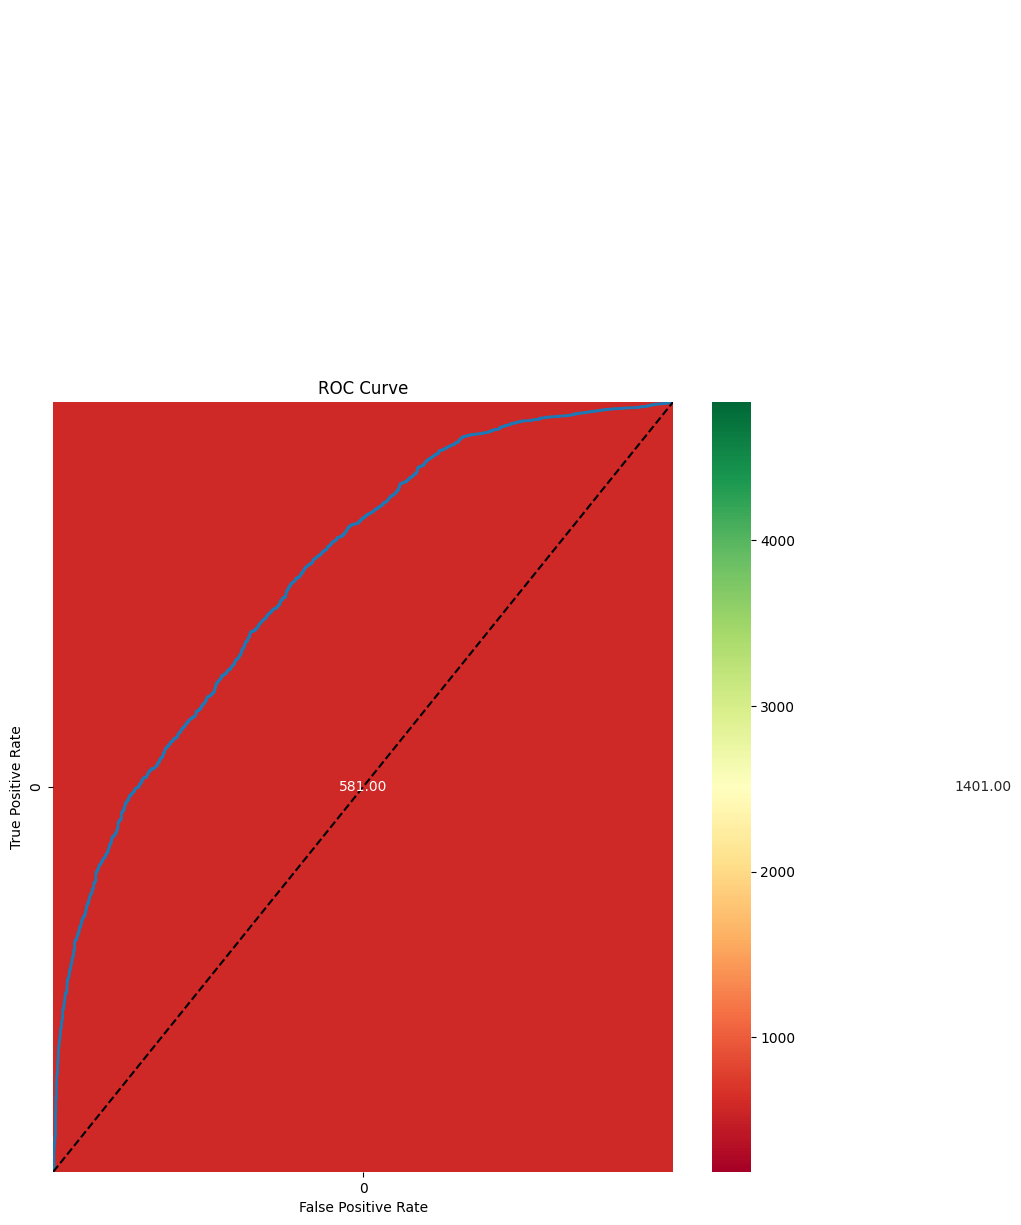

AUC: 0.7762448085294511


In [72]:
y_pred = pipeline1.predict(x1_test)

plot_cm(y1_test, y_pred)

precision = precision_score(y1_test, y_pred)
recall = recall_score(y1_test, y_pred)
f1 = f1_score(y1_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# The model has high precision, indicating that when it predicts a positive case, it's usually correct.
# However, the recall is lower, meaning it misses some actual positive cases.

y_pred_proba = pipeline1.predict_proba(x1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
roc_auc = roc_auc_score(y1_test, y_pred_proba)

plot_roc_curve(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(f"AUC: {roc_auc}")

# The ROC AUC score is a good measure of the model's ability to distinguish between positive and negative classes.
# A higher AUC indicates better performance.


### Conclusion
The logistic regression model achieved a relatively high accuracy in predicting whether a given day is a weekday or weekend based on the steel industry data.
The confusion matrix and the precision, recall, and F1-score metrics provide insights into the model's performance.
The ROC curve and AUC further demonstrate the model's ability to differentiate between the two classes effectively.
Overall, the model shows promise in predicting week status, but further analysis and potentially refining the model could enhance its performance.
